In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")
sample_submission = pd.read_csv('sample_submit.csv')

In [36]:
test.head()

,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,49年0ヶ月,南,50.22m2,8階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\tエレベーター\t公営水...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,鉄骨造,NaN
1,31472,東京都目黒区八雲１丁目11-8,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,1R,0年2ヶ月,南東,20.88m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCSアンテナ／\tBSアンテナ／\tインターネット使用料無料,エアコン付\tシューズボックス／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水／...,"駐車場\t近隣\t34,000円(税込)\t距離200m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 128m\t【スーパー】 313m\t【コンビニ】 374m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
2,31473,東京都豊島区池袋本町２丁目22-2,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,1K,23年4ヶ月,南東,26.93m2,1階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯...,"駐車場\t空有\t5,000円(税込)\t(敷金あり\t1ヶ月)\t駐輪場\t空有\tバイク...",【スーパー】 529m\t【スーパー】 810m\t【コンビニ】 316m\t【コンビニ】 ...,鉄骨造,2年間
3,31474,東京都杉並区和泉１丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩10分\t\t京王線\t代田橋駅\t徒歩8分...,1K,36年2ヶ月,南東,23.57m2,1階／2階建,シャワー,ガスコンロ／\t給湯,NaN,エアコン付\tシューズボックス／\t2面採光／\t室外洗濯機置場\t公営水道／\t下水／\t...,駐輪場\t空有\t0円,【スーパー】 286m\t【スーパー】 702m\t【コンビニ】 489m\t【コンビニ】 ...,木造,2年間
4,31475,東京都杉並区堀ノ内２丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩12分\t\t丸ノ内線(池袋－荻窪)\t新高...,2LDK,45年4ヶ月,南,50m2,4階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別,コンロ設置可（口数不明）／\t給湯,インターネット対応,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置...,"駐車場\t近隣\t22,600円\t距離177m",【コンビニ】 312m\t【コンビニ】 436m\t【スーパー】 902m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間


In [4]:
df =pd.read_csv("./train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31470 entries, 0 to 31469
Data columns (total 17 columns):
id        31470 non-null int64
賃料        31470 non-null int64
所在地       31470 non-null object
アクセス      31470 non-null object
間取り       31470 non-null object
築年数       31470 non-null object
方角        28721 non-null object
面積        31470 non-null object
所在階       31470 non-null object
バス・トイレ    31141 non-null object
キッチン      30849 non-null object
放送・通信     28030 non-null object
室内設備      31388 non-null object
駐車場       26183 non-null object
周辺環境      22038 non-null object
建物構造      31470 non-null object
契約期間      24350 non-null object
dtypes: int64(2), object(15)
memory usage: 4.1+ MB


In [16]:
plt.style.use('ggplot')

In [17]:
pd.options.display.float_format ='{:.0f}'.format
df['賃料'].describe()

count     31470
mean     118290
std       73749
min       25000
25%       76000
50%      102000
75%      136000
max     2500000
Name: 賃料, dtype: float64

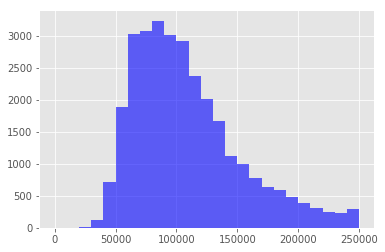

In [18]:
df['賃料'].hist(bins=list(range(0, 260000,10000)), color ='blue', alpha=0.6)

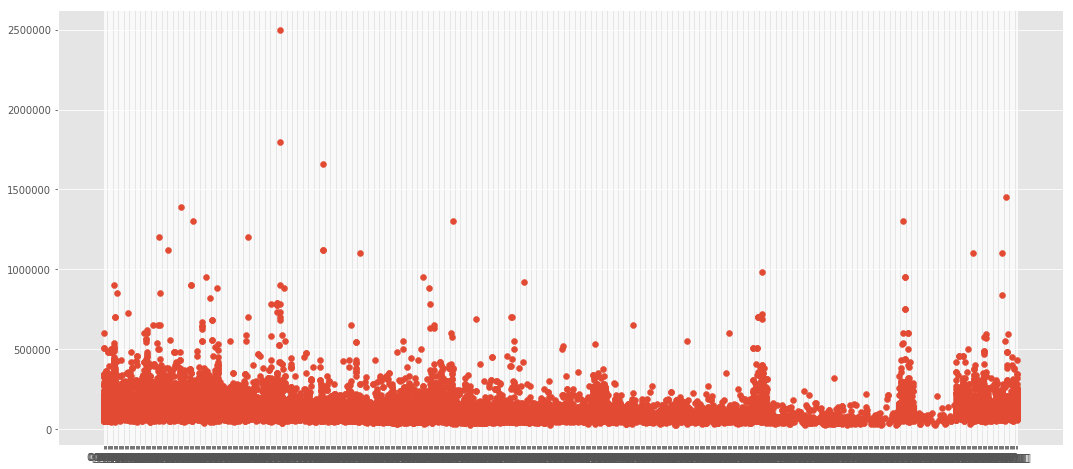

In [19]:
plt.figure(figsize=(18,8))
plt.scatter(x=df['築年数'], y=df['賃料'])

In [20]:
df[df['賃料']>1500000][['所在地','アクセス','間取り','築年数','方角','面積','所在階','バス・トイレ','キッチン','放送・通信','室内設備','駐車場','周辺環境','建物構造','契約期間']]



,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
5093,東京都港区三田２丁目4-3,南北線\t麻布十番駅\t徒歩8分\t\t都営大江戸線\t赤羽橋駅\t徒歩9分\t\t山手線\...,2LDK+S(納戸),1年8ヶ月,西,217.29m2,9階／9階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン\t／\tL...,インターネット対応,エアコン付／\t床暖房\tウォークインクローゼット\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有(43台)\t48,600円",【飲食店】 959m\t【飲食店】 611m\t【スーパー】 417m\t【スーパー】 65...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。
20643,東京都港区三田２丁目4-3,南北線\t麻布十番駅\t徒歩8分\t\t都営大江戸線\t赤羽橋駅\t徒歩9分\t\t山手線\...,2LDK+S(納戸),1年8ヶ月,南,151.81m2,5階／9階建（地下2階）,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...,IHコンロ\t／\tコンロ3口／\tシステムキッチン\t／\tカウンターキッチン,インターネット対応,エアコン付／\t床暖房\tウォークインクローゼット\tシューズボックス／\tバルコニー／\t...,"駐車場\t空有(43台)\t48,600円",【飲食店】 959m\t【飲食店】 611m\t【スーパー】 417m\t【スーパー】 65...,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。
30539,東京都渋谷区広尾１丁目,山手線\t恵比寿駅\t徒歩6分\t\t日比谷線\t恵比寿駅\t徒歩6分,4LDK+S(納戸),22年7ヶ月,南,341.3m2,12階／13階建（地下2階）,温水洗浄便座,給湯／\t冷蔵庫あり,CATV,トランクルーム\tエレベーター,駐車場\t無,NaN,RC（鉄筋コンクリート）,3年間\t※この物件は\t定期借家\tです。


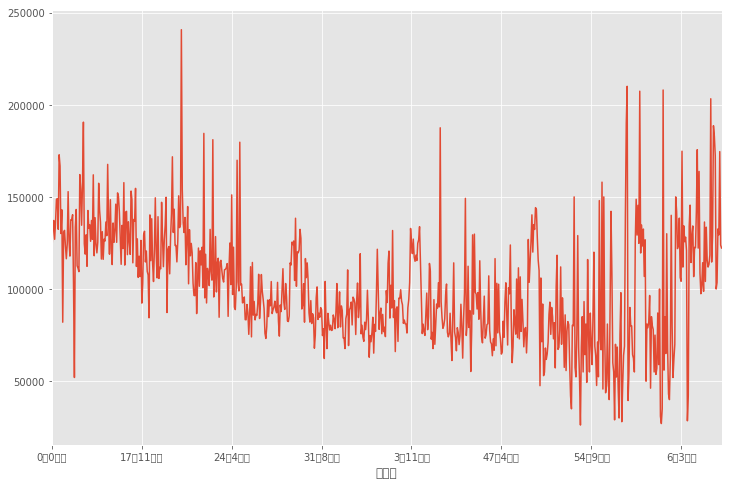

In [21]:
df.groupby(by='築年数')['賃料'].mean().plot(figsize=(12,8))

In [22]:
import re

In [23]:
df['都県'] = df['所在地'].apply(lambda x: re.split('[都県]', x)[0])
print(df['都県'])
df['市区'] = df['所在地'].apply(lambda x: re.split('[都県市区]', x)[1]) 
print(df['市区'])

0        東京
1        東京
2        東京
3        東京
4        東京
5        東京
6        東京
7        東京
8        東京
9        東京
10       東京
11       東京
12       東京
13       東京
14       東京
15       東京
16       東京
17       東京
18       東京
19       東京
20       東京
21       東京
22       東京
23       東京
24       東京
25       東京
26       東京
27       東京
28       東京
29       東京
         ..
31440    東京
31441    東京
31442    東京
31443    東京
31444    東京
31445    東京
31446    東京
31447    東京
31448    東京
31449    東京
31450    東京
31451    東京
31452    東京
31453    東京
31454    東京
31455    東京
31456    東京
31457    東京
31458    東京
31459    東京
31460    東京
31461    東京
31462    東京
31463    東京
31464    東京
31465    東京
31466    東京
31467    東京
31468    東京
31469    東京
Name: 都県, Length: 31470, dtype: object
0          北
1         中央
2         渋谷
3         杉並
4         葛飾
5         荒川
6         練馬
7         目黒
8         文京
9         板橋
10        大田
11       江戸川
12         港
13        杉並
14        墨田
15        渋谷
16        板橋
17      

In [24]:
df.都県.unique()

array(['東京'], dtype=object)

In [25]:
df.市区.unique()

array(['北', '中央', '渋谷', '杉並', '葛飾', '荒川', '練馬', '目黒', '文京', '板橋', '大田',
       '江戸川', '港', '墨田', '新宿', '中野', '豊島', '台東', '足立', '世田谷', '江東', '品川',
       '千代田'], dtype=object)

In [32]:
grouped = df.groupby('市区')['id'].count().sort_values(ascending = True)

Text(0.5,1,'東京２３区＋aの賃貸物件数')

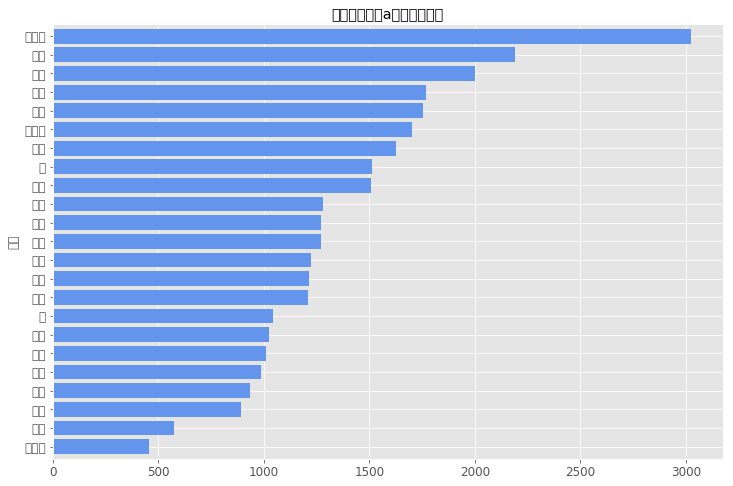

In [33]:
grouped.plot(kind ='barh', figsize=(12, 8), fontsize=12, 
             color='cornflowerblue', width=0.8)
plt.title('東京２３区＋aの賃貸物件数')

In [35]:
df.columns

Index(['id', '賃料', '所在地', 'アクセス', '間取り', '築年数', '方角', '面積', '所在階', 'バス・トイレ',
       'キッチン', '放送・通信', '室内設備', '駐車場', '周辺環境', '建物構造', '契約期間', '都県', '市区'],
      dtype='object')